<a href="https://colab.research.google.com/github/jellydaniellie/cs6501-project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas beautifulsoup4 matplotlib scikit-learn

In [ ]:
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
from datetime import datetime
from IPython.display import display

In [ ]:
from google.colab import files

uploaded_files = files.upload()

chrome_history_file = "History.json"
youtube_history_file = "search-history.html"
fitbit_sleep_files = [
    "sleep-2024-11-23.json", "sleep-2024-12-23.json",
    "sleep-2025-01-22.json"
]


Saving sleep-2024-12-23.json to sleep-2024-12-23.json
Saving sleep-2024-11-23.json to sleep-2024-11-23.json
Saving sleep-2025-01-22.json to sleep-2025-01-22.json
Saving History.json to History.json
Saving watch-history.html to watch-history.html
Saving search-history.html to search-history.html


# **FITBIT DATA**

In [ ]:
sleep_records = []
for file in fitbit_sleep_files:
    with open(file, "r") as f:
        data = json.load(f)
        for entry in data:
            sleep_records.append({
                "Date": entry["dateOfSleep"],
                "Sleep Start": datetime.strptime(entry["startTime"], "%Y-%m-%dT%H:%M:%S.%f"),
                "Sleep End": datetime.strptime(entry["endTime"], "%Y-%m-%dT%H:%M:%S.%f"),
                "Sleep Duration (hours)": round(entry["minutesAsleep"] / 60, 2)
            })

fitbit_sleep_df = pd.DataFrame(sleep_records)

# Select Longest Sleep Session Per Day (Exclude FitBit Naps)
fitbit_sleep_df = fitbit_sleep_df.loc[fitbit_sleep_df.groupby("Date")["Sleep Duration (hours)"].idxmax()].reset_index(drop=True)

display(fitbit_sleep_df)

,Date,Sleep Start,Sleep End,Sleep Duration (hours)
0,2024-11-23,2024-11-23 03:31:00,2024-11-23 11:29:30,7.17
1,2024-11-24,2024-11-24 03:50:00,2024-11-24 10:40:00,5.72
2,2024-11-25,2024-11-25 03:26:00,2024-11-25 12:12:00,7.35
3,2024-11-26,2024-11-26 04:51:00,2024-11-26 13:50:00,7.37
4,2024-11-27,2024-11-27 03:10:00,2024-11-27 11:48:30,7.38
...,...,...,...,...
81,2025-02-12,2025-02-12 04:13:00,2025-02-12 10:13:00,4.90
82,2025-02-13,2025-02-13 01:07:00,2025-02-13 09:59:30,7.68
83,2025-02-15,2025-02-15 01:41:00,2025-02-15 08:50:00,6.13
84,2025-02-16,2025-02-16 03:06:00,2025-02-16 09:48:00,6.25


# **Chrome History**

In [ ]:
with open(chrome_history_file, "r") as f:
    chrome_data = json.load(f)

chrome_df = pd.DataFrame(chrome_data["Browser History"])
chrome_df["datetime"] = pd.to_datetime(chrome_df["time_usec"] / 1000, unit="ms")
chrome_df.head()

,favicon_url,page_transition_qualifier,title,url,time_usec,client_id,datetime
0,https://hms.housing.virginia.edu/favicon.ico,CLIENT_REDIRECT,Resident Staff Programming Requests,https://hms.housing.virginia.edu/programming/l...,1739814499452689,4QACcg+HWxJH21Ud51xQtw==,2025-02-17 17:48:19.452688965
1,https://hms.housing.virginia.edu/favicon.ico,CLIENT_REDIRECT,Resident Staff Programming Requests,https://hms.housing.virginia.edu/programming/v...,1739814375729375,4QACcg+HWxJH21Ud51xQtw==,2025-02-17 17:46:15.729375000
2,https://res-1.cdn.office.net/officeonline/x/s/...,CLIENT_REDIRECT,Programming Tracker- 3.0.xlsx,https://myuva-my.sharepoint.com/:x:/r/personal...,1739814011148803,4QACcg+HWxJH21Ud51xQtw==,2025-02-17 17:40:11.148802979
3,https://res-1.cdn.office.net/officeonline/x/s/...,CLIENT_REDIRECT,Programming Tracker- 3.0.xlsx,https://myuva-my.sharepoint.com/:x:/r/personal...,1739814011067832,4QACcg+HWxJH21Ud51xQtw==,2025-02-17 17:40:11.067832031
4,https://hms.housing.virginia.edu/favicon.ico,CLIENT_REDIRECT,Resident Staff Programming Requests,https://hms.housing.virginia.edu/programming/l...,1739813902092928,4QACcg+HWxJH21Ud51xQtw==,2025-02-17 17:38:22.092927979


# **YOUTUBE HISTORY**

In [ ]:
with open(youtube_history_file, "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "html.parser")

# Only Consider "Watched" Videos
watched_entries = soup.find_all(string=re.compile("Watched"))

for entry in watched_entries[:1]:
    print(entry.parent.prettify())
    print("=" * 80)


<div class="content-cell mdl-cell mdl-cell--6-col mdl-typography--body-1">
 Watched
 <a href="https://www.youtube.com/watch?v=a8EylHn1-mk">
  The first toy that your cat won't get bored of 😎
 </a>
 <br/>
 Watched at 1:53 AM
 <br/>
 Feb 17, 2025, 1:53:55 AM EST
</div>



In [ ]:
with open(youtube_history_file, "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "html.parser")

watched_entries = soup.find_all(string=re.compile("Watched"))

timestamps = []
video_titles = []

for entry in watched_entries:
    parent_div = entry.parent
    text_lines = parent_div.get_text(separator="\n").split("\n")
    video_link_tag = parent_div.find("a")

    if video_link_tag:
        video_title = video_link_tag.text.strip()

        for line in text_lines:
            line = line.replace("\u202F", " ")
            match = re.search(r'([A-Za-z]{3} \d{1,2}, \d{4}, \d{1,2}:\d{2}(:\d{2})? [APM]{2})', line)
            if match:
                try:
                    timestamp_format = "%b %d, %Y, %I:%M:%S %p" if ":" in match.group(0)[-8:] else "%b %d, %Y, %I:%M %p"
                    timestamp = datetime.strptime(match.group(0), timestamp_format)

                    if video_title not in video_titles or timestamp not in timestamps:
                      timestamps.append(timestamp)
                      video_titles.append(video_title)

                    break
                except ValueError:
                    continue

youtube_df = pd.DataFrame({"datetime": timestamps, "video_title": video_titles})
print(youtube_df.head(), f"\nTotal unique watched entries extracted: {len(youtube_df)}")


             datetime                                        video_title
0 2025-02-17 01:53:55   The first toy that your cat won't get bored of 😎
1 2025-02-17 01:39:25                               maoswitch:19ext 9:16
2 2025-02-17 01:34:37                  Food for work. Less work for you.
3 2025-02-17 01:29:04                “What If” | Big Game Spot | Disney+
4 2025-02-16 21:05:16  Now Business Taxes is Easier - TurboTax 2025 C... 
Total unique watched entries extracted: 13591


# **SLEEP PREDICTION METHOD **
Assigns sleep after midnight to night before, but Fitbit does not do this. Proceed to next section for Fitbit aligned implementation.

In [ ]:
# from datetime import datetime, timedelta

# # Define bedtime and wake-up ranges
# BEDTIME_START = 17  # 5 PM
# BEDTIME_END = 5  # 5 AM (previous day)
# WAKEUP_MIN = 0  # 12 AM
# WAKEUP_MAX = 15  # 3 PM
# MIN_SLEEP_HOURS = 2  # Minimum valid sleep duration
# MAX_SLEEP_HOURS = 14  # Maximum valid sleep duration

# # Ensure Fitbit Sleep Data is loaded
# fitbit_sleep_df["Date"] = pd.to_datetime(fitbit_sleep_df["Date"])

# # Combine Chrome & YouTube timestamps into one dataset
# activity_df = pd.concat([chrome_df[["datetime"]], youtube_df[["datetime"]]])
# activity_df = activity_df.sort_values(by="datetime").reset_index(drop=True)

# sleep_predictions = {}

# for date in activity_df["datetime"].dt.date.unique():
#     daily_data = activity_df[activity_df["datetime"].dt.date == date].sort_values(by="datetime")

#     # Step 1: Night Time Sleep Detection
#     night_activity = daily_data[
#         (daily_data["datetime"].dt.hour >= BEDTIME_START) |
#         (daily_data["datetime"].dt.hour < BEDTIME_END)
#     ]
#     last_activity = night_activity["datetime"].max() if not night_activity.empty else None

#     next_day_data = activity_df[activity_df["datetime"].dt.date == (date + timedelta(days=1))]
#     morning_activity = next_day_data[
#         (next_day_data["datetime"].dt.hour >= WAKEUP_MIN) &
#         (next_day_data["datetime"].dt.hour <= WAKEUP_MAX)
#     ]
#     first_activity = morning_activity["datetime"].min() if not morning_activity.empty else None

#     if last_activity is not None and first_activity is not None:
#         sleep_duration = (first_activity - last_activity).total_seconds() / 3600

#         if MIN_SLEEP_HOURS <= sleep_duration <= MAX_SLEEP_HOURS:
#             assigned_date = last_activity.date() if last_activity.hour >= BEDTIME_START else last_activity.date() - timedelta(days=1)

#             # Store result in dictionary
#             sleep_predictions[assigned_date] = {
#                 "Predicted Sleep Start": last_activity,
#                 "Predicted Sleep End": first_activity,
#                 "Predicted Sleep Duration (hrs)": round(sleep_duration, 2),
#                 "Method": "Nighttime"
#             }

#     # Step 2: Longest Inactivity Gap (Fallback)
#     sleep_start = None
#     sleep_end = None
#     max_gap = timedelta(hours=MIN_SLEEP_HOURS)
#     longest_gap = timedelta(0)  # the absolute longest gap
#     longest_sleep_start = None
#     longest_sleep_end = None


#     for i in range(len(daily_data) - 1):
#         current_time = daily_data.iloc[i]["datetime"]
#         next_time = daily_data.iloc[i + 1]["datetime"]
#         gap = next_time - current_time

#         # Track the longest gap overall
#         if gap > longest_gap:
#           longest_gap = gap
#           longest_sleep_start = current_time
#           longest_sleep_end = next_time

#         # Prefer gaps at least MIN_SLEEP_HOURS long
#         if gap >= max_gap:
#           sleep_start = current_time
#           sleep_end = next_time
#           max_gap = gap  # update the max found so far

#     # use longest gap if needed
#     if sleep_start is None or sleep_end is None:
#       sleep_start = longest_sleep_start
#       sleep_end = longest_sleep_end

#     if sleep_start and sleep_end:
#         sleep_duration = (sleep_end - sleep_start).total_seconds() / 3600

#         if MIN_SLEEP_HOURS <= sleep_duration <= MAX_SLEEP_HOURS:
#             assigned_date = sleep_start.date() if sleep_start.hour >= BEDTIME_START else sleep_start.date() - timedelta(days=1)

#             # Check if this date already exists from the nighttime method
#             if assigned_date in sleep_predictions:
#                 existing = sleep_predictions[assigned_date]

#                 # If new sleep estimate starts later at night, replace existing one
#                 if sleep_start.hour < BEDTIME_END:  # Ensures sleep doesn't start too late in the morning
#                   if existing["Predicted Sleep Start"] < sleep_start:
#                     sleep_predictions[assigned_date] = {
#                         "Predicted Sleep Start": sleep_start,
#                         "Predicted Sleep End": sleep_end,
#                         "Predicted Sleep Duration (hrs)": round(sleep_duration, 2),
#                         "Method": "Inactivity Gap"
#                     }

#                 # Only override if the existing sleep duration is less than 2 hours
#                 # OR if the new sleep starts before 5 AM the next day
#                 elif existing["Predicted Sleep Duration (hrs)"] < MIN_SLEEP_HOURS or (sleep_start.hour < BEDTIME_END and sleep_duration > existing["Predicted Sleep Duration (hrs)"]):
#                   sleep_predictions[assigned_date] = {
#                     "Predicted Sleep Start": sleep_start,
#                     "Predicted Sleep End": sleep_end,
#                     "Predicted Sleep Duration (hrs)": round(sleep_duration, 2),
#                     "Method": "Inactivity Gap"
#                   }
#             else:
#                 sleep_predictions[assigned_date] = {
#                     "Predicted Sleep Start": sleep_start,
#                     "Predicted Sleep End": sleep_end,
#                     "Predicted Sleep Duration (hrs)": round(sleep_duration, 2),
#                     "Method": "Inactivity Gap"
#                 }

# predicted_sleep_df = pd.DataFrame.from_dict(sleep_predictions, orient="index").reset_index()
# predicted_sleep_df.rename(columns={"index": "Date"}, inplace=True)
# predicted_sleep_df["Date"] = pd.to_datetime(predicted_sleep_df["Date"])

# # Use Predictions with Fitbit Dates
# predicted_sleep_df = predicted_sleep_df[predicted_sleep_df["Date"].isin(fitbit_sleep_df["Date"])]

# # Merge Fitbit & Predicted Data
# final_sleep_df = fitbit_sleep_df.merge(predicted_sleep_df, on="Date", how="left")

# display(final_sleep_df)


# num_missing_methods = final_sleep_df["Method"].isna().sum()
# print(f"Number of NaN values in 'Method': {num_missing_methods}")


# **PREDICTIONS FIXING DATE ASSIGNMENT**

In [ ]:
from datetime import datetime, timedelta

# Define bedtime and wake-up ranges
BEDTIME_START = 17  # 5 PM
BEDTIME_END = 5  # 5 AM (previous day)
WAKEUP_MIN = 0  # 12 AM
WAKEUP_MAX = 15  # 3 PM
MIN_SLEEP_HOURS = 2  # Minimum valid sleep duration
MAX_SLEEP_HOURS = 14  # Maximum valid sleep duration

# Ensure Fitbit Sleep Data is loaded
fitbit_sleep_df["Date"] = pd.to_datetime(fitbit_sleep_df["Date"])

# Combine Chrome & YouTube timestamps into one dataset
activity_df = pd.concat([chrome_df[["datetime"]], youtube_df[["datetime"]]])
activity_df = activity_df.sort_values(by="datetime").reset_index(drop=True)

sleep_predictions = {}

for date in activity_df["datetime"].dt.date.unique():
    daily_data = activity_df[activity_df["datetime"].dt.date == date].sort_values(by="datetime")

    # Step 1: Night Time Sleep Detection
    night_activity = daily_data[
        (daily_data["datetime"].dt.hour >= BEDTIME_START) |
        (daily_data["datetime"].dt.hour < BEDTIME_END)
    ]
    last_activity = night_activity["datetime"].max() if not night_activity.empty else None

    next_day_data = activity_df[activity_df["datetime"].dt.date == (date + timedelta(days=1))]
    morning_activity = next_day_data[
        (next_day_data["datetime"].dt.hour >= WAKEUP_MIN) &
        (next_day_data["datetime"].dt.hour <= WAKEUP_MAX)
    ]
    first_activity = morning_activity["datetime"].min() if not morning_activity.empty else None

    if last_activity is not None and first_activity is not None:
        sleep_duration = (first_activity - last_activity).total_seconds() / 3600

        if MIN_SLEEP_HOURS <= sleep_duration <= MAX_SLEEP_HOURS:
            assigned_date = last_activity.date() if last_activity.hour >= BEDTIME_START else last_activity.date()

            # Store result in dictionary
            sleep_predictions[assigned_date] = {
                "Predicted Sleep Start": last_activity,
                "Predicted Sleep End": first_activity,
                "Predicted Sleep Duration (hrs)": round(sleep_duration, 2),
                "Method": "Nighttime"
            }

    # Step 2: Longest Inactivity Gap (Fallback)
    sleep_start = None
    sleep_end = None
    max_gap = timedelta(hours=MIN_SLEEP_HOURS)
    longest_gap = timedelta(0)  # the absolute longest gap
    longest_sleep_start = None
    longest_sleep_end = None


    for i in range(len(daily_data) - 1):
        current_time = daily_data.iloc[i]["datetime"]
        next_time = daily_data.iloc[i + 1]["datetime"]
        gap = next_time - current_time

        # Track the longest gap overall
        if gap > longest_gap:
          longest_gap = gap
          longest_sleep_start = current_time
          longest_sleep_end = next_time

        # Prefer gaps at least MIN_SLEEP_HOURS long
        if gap >= max_gap:
          sleep_start = current_time
          sleep_end = next_time
          max_gap = gap  # update the max found so far

    # use longest gap if needed
    if sleep_start is None or sleep_end is None:
      sleep_start = longest_sleep_start
      sleep_end = longest_sleep_end

    if sleep_start and sleep_end:
        sleep_duration = (sleep_end - sleep_start).total_seconds() / 3600

        if MIN_SLEEP_HOURS <= sleep_duration <= MAX_SLEEP_HOURS:
            assigned_date = sleep_start.date() if sleep_start.hour >= BEDTIME_START else sleep_start.date()

            # Check if this date already exists from the nighttime method
            if assigned_date in sleep_predictions:
                existing = sleep_predictions[assigned_date]

                # If new sleep estimate starts later at night, replace existing one
                if sleep_start.hour < BEDTIME_END:  # Ensures sleep doesn't start too late in the morning
                  if existing["Predicted Sleep Start"] < sleep_start:
                    sleep_predictions[assigned_date] = {
                        "Predicted Sleep Start": sleep_start,
                        "Predicted Sleep End": sleep_end,
                        "Predicted Sleep Duration (hrs)": round(sleep_duration, 2),
                        "Method": "Inactivity Gap"
                    }

                # Only override if the existing sleep duration is less than 2 hours
                # OR if the new sleep starts before 5 AM the next day
                elif existing["Predicted Sleep Duration (hrs)"] < MIN_SLEEP_HOURS or (sleep_start.hour < BEDTIME_END and sleep_duration > existing["Predicted Sleep Duration (hrs)"]):
                  sleep_predictions[assigned_date] = {
                    "Predicted Sleep Start": sleep_start,
                    "Predicted Sleep End": sleep_end,
                    "Predicted Sleep Duration (hrs)": round(sleep_duration, 2),
                    "Method": "Inactivity Gap"
                  }
            else:
                sleep_predictions[assigned_date] = {
                    "Predicted Sleep Start": sleep_start,
                    "Predicted Sleep End": sleep_end,
                    "Predicted Sleep Duration (hrs)": round(sleep_duration, 2),
                    "Method": "Inactivity Gap"
                }

predicted_sleep_df = pd.DataFrame.from_dict(sleep_predictions, orient="index").reset_index()
predicted_sleep_df.rename(columns={"index": "Date"}, inplace=True)
predicted_sleep_df["Date"] = pd.to_datetime(predicted_sleep_df["Date"])

# Use Predictions with Fitbit Dates
predicted_sleep_df = predicted_sleep_df[predicted_sleep_df["Date"].isin(fitbit_sleep_df["Date"])]

# Merge Fitbit & Predicted Data
final_sleep_df = fitbit_sleep_df.merge(predicted_sleep_df, on="Date", how="left")

display(final_sleep_df)


num_missing_methods = final_sleep_df["Method"].isna().sum()
print(f"Number of NaN values in 'Method': {num_missing_methods}")


,Date,Sleep Start,Sleep End,Sleep Duration (hours),Predicted Sleep Start,Predicted Sleep End,Predicted Sleep Duration (hrs),Method
0,2024-11-23,2024-11-23 03:31:00,2024-11-23 11:29:30,7.17,2024-11-23 20:58:40.214270020,2024-11-24 05:37:44.874562988,8.65,Nighttime
1,2024-11-24,2024-11-24 03:50:00,2024-11-24 10:40:00,5.72,2024-11-24 18:28:06.365790039,2024-11-25 02:32:32.000000000,8.07,Nighttime
2,2024-11-25,2024-11-25 03:26:00,2024-11-25 12:12:00,7.35,NaT,NaT,NaN,NaN
3,2024-11-26,2024-11-26 04:51:00,2024-11-26 13:50:00,7.37,2024-11-26 18:08:55.000000000,2024-11-27 00:07:32.522096924,5.98,Nighttime
4,2024-11-27,2024-11-27 03:10:00,2024-11-27 11:48:30,7.38,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...
81,2025-02-12,2025-02-12 04:13:00,2025-02-12 10:13:00,4.90,2025-02-12 20:08:59.656790039,2025-02-13 00:11:28.000000000,4.04,Nighttime
82,2025-02-13,2025-02-13 01:07:00,2025-02-13 09:59:30,7.68,2025-02-13 23:04:41.568853027,2025-02-14 01:18:29.312353027,2.23,Nighttime
83,2025-02-15,2025-02-15 01:41:00,2025-02-15 08:50:00,6.13,2025-02-15 23:40:08.000000000,2025-02-16 02:18:11.000000000,2.63,Nighttime
84,2025-02-16,2025-02-16 03:06:00,2025-02-16 09:48:00,6.25,2025-02-16 04:22:40.656166992,2025-02-16 15:34:06.626332031,11.19,Inactivity Gap


Number of NaN values in 'Method': 17


In [ ]:
final_sleep_df.to_csv("sleep_predictions.csv", index=False)
from google.colab import files
files.download("sleep_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **FOR DEBUGGING**

In [ ]:
date_to_check = datetime(2024, 12, 9).date()

# Check nighttime sleep detection
night_activity = activity_df[
    (activity_df["datetime"].dt.date == date_to_check) &
    ((activity_df["datetime"].dt.hour >= BEDTIME_START) | (activity_df["datetime"].dt.hour < BEDTIME_END))
]
last_activity = night_activity["datetime"].max() if not night_activity.empty else None

next_day_data = activity_df[activity_df["datetime"].dt.date == (date_to_check + timedelta(days=1))]
morning_activity = next_day_data[
    (next_day_data["datetime"].dt.hour >= WAKEUP_MIN) &
    (next_day_data["datetime"].dt.hour <= WAKEUP_MAX)
]
first_activity = morning_activity["datetime"].min() if not morning_activity.empty else None

print(f"Nighttime Sleep Detection for {date_to_check}:")
print(f"  Last activity before sleep: {last_activity}")
print(f"  First activity after sleep: {first_activity}")

if last_activity and first_activity:
    sleep_duration = (first_activity - last_activity).total_seconds() / 3600
    print(f"  Sleep duration: {sleep_duration:.2f} hours")

# Check longest inactivity gap
daily_data = activity_df[activity_df["datetime"].dt.date == date_to_check].sort_values(by="datetime")

longest_gap = timedelta(0)
longest_sleep_start = None
longest_sleep_end = None

for i in range(len(daily_data) - 1):
    current_time = daily_data.iloc[i]["datetime"]
    next_time = daily_data.iloc[i + 1]["datetime"]
    gap = next_time - current_time

    if gap > longest_gap:
        longest_gap = gap
        longest_sleep_start = current_time
        longest_sleep_end = next_time

print(f"\nInactivity Gap Detection for {date_to_check}:")
print(f"  Longest inactivity gap: {longest_gap}")
print(f"  Start of longest inactivity gap: {longest_sleep_start}")
print(f"  End of longest inactivity gap: {longest_sleep_end}")


Nighttime Sleep Detection for 2024-12-09:
  Last activity before sleep: 2024-12-09 23:42:06.805686035
  First activity after sleep: 2024-12-10 02:33:08.669204102
  Sleep duration: 2.85 hours

Inactivity Gap Detection for 2024-12-09:
  Longest inactivity gap: 0 days 12:40:54.779225830
  Start of longest inactivity gap: 2024-12-09 08:40:11.107746094
  End of longest inactivity gap: 2024-12-09 21:21:05.886971924


In [ ]:
start_date = datetime(2024, 11, 23)
end_date = datetime(2024, 11, 27)

chrome_df["datetime"] = pd.to_datetime(chrome_df["datetime"])
youtube_df["datetime"] = pd.to_datetime(youtube_df["datetime"])

filtered_chrome = chrome_df[(chrome_df["datetime"] >= start_date) & (chrome_df["datetime"] <= end_date)]
filtered_youtube = youtube_df[(youtube_df["datetime"] >= start_date) & (youtube_df["datetime"] <= end_date)]
filtered_activity = pd.concat([filtered_chrome, filtered_youtube]).sort_values(by="datetime").reset_index(drop=True)

print("\n All Activity Between", start_date.date(), "and", end_date.date(), "\n")
print(filtered_activity.to_string(index=False))

daily_activity_summary = filtered_activity.groupby(filtered_activity["datetime"].dt.date).agg(
    First_Activity=("datetime", "min"),
    Last_Activity=("datetime", "max")
).reset_index()

print("\n First and Last Activity Per Day \n")
print(daily_activity_summary.to_string(index=False))

first_overall = filtered_activity["datetime"].min()
last_overall = filtered_activity["datetime"].max()

print("\n Overall First Activity:", first_overall)
print(" Overall Last Activity:", last_overall)




 All Activity Between 2024-11-23 and 2024-11-27 

                                                                                                                                                                                                                                favicon_url page_transition_qualifier                                                                                                                                                   title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

# **Duration Differences**

In [ ]:
final_sleep_df["Sleep Start"] = pd.to_datetime(final_sleep_df["Sleep Start"])
final_sleep_df["Sleep End"] = pd.to_datetime(final_sleep_df["Sleep End"])
final_sleep_df["Predicted Sleep Start"] = pd.to_datetime(final_sleep_df["Predicted Sleep Start"])
final_sleep_df["Predicted Sleep End"] = pd.to_datetime(final_sleep_df["Predicted Sleep End"])

# Sleep Duration Difference (in hours)
final_sleep_df["Duration Difference (hrs)"] = final_sleep_df["Predicted Sleep Duration (hrs)"] - ((final_sleep_df["Sleep End"] - final_sleep_df["Sleep Start"]).dt.total_seconds() / 3600)

from IPython.display import display
display(final_sleep_df)

,Date,Sleep Start,Sleep End,Sleep Duration (hours),Predicted Sleep Start,Predicted Sleep End,Predicted Sleep Duration (hrs),Method,Duration Difference (hrs)
0,2024-11-23,2024-11-23 03:31:00,2024-11-23 11:29:30,7.17,2024-11-23 20:58:40.214270020,2024-11-24 05:37:44.874562988,8.65,Nighttime,0.675000
1,2024-11-24,2024-11-24 03:50:00,2024-11-24 10:40:00,5.72,2024-11-24 18:28:06.365790039,2024-11-25 02:32:32.000000000,8.07,Nighttime,1.236667
2,2024-11-25,2024-11-25 03:26:00,2024-11-25 12:12:00,7.35,NaT,NaT,NaN,NaN,NaN
3,2024-11-26,2024-11-26 04:51:00,2024-11-26 13:50:00,7.37,2024-11-26 18:08:55.000000000,2024-11-27 00:07:32.522096924,5.98,Nighttime,-3.003333
4,2024-11-27,2024-11-27 03:10:00,2024-11-27 11:48:30,7.38,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
81,2025-02-12,2025-02-12 04:13:00,2025-02-12 10:13:00,4.90,2025-02-12 20:08:59.656790039,2025-02-13 00:11:28.000000000,4.04,Nighttime,-1.960000
82,2025-02-13,2025-02-13 01:07:00,2025-02-13 09:59:30,7.68,2025-02-13 23:04:41.568853027,2025-02-14 01:18:29.312353027,2.23,Nighttime,-6.645000
83,2025-02-15,2025-02-15 01:41:00,2025-02-15 08:50:00,6.13,2025-02-15 23:40:08.000000000,2025-02-16 02:18:11.000000000,2.63,Nighttime,-4.520000
84,2025-02-16,2025-02-16 03:06:00,2025-02-16 09:48:00,6.25,2025-02-16 04:22:40.656166992,2025-02-16 15:34:06.626332031,11.19,Inactivity Gap,4.490000


# **DURATION ANALYSIS**

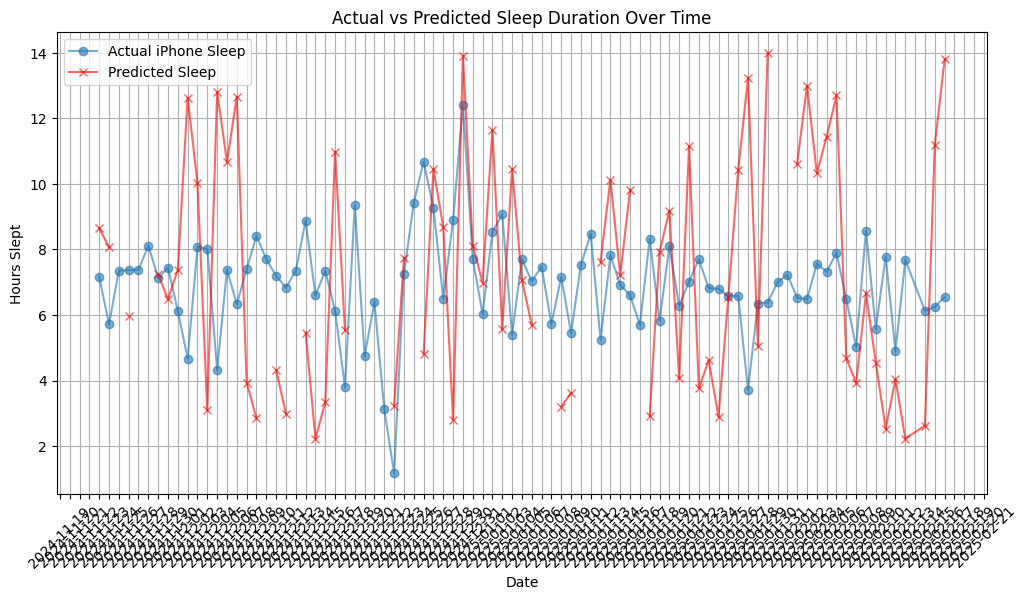

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure Date column is in datetime format (should already be, but just in case)
final_sleep_df["Date"] = pd.to_datetime(final_sleep_df["Date"])

# Sort data by Date
final_sleep_df = final_sleep_df.sort_values("Date")

# Plot using the actual Date column
plt.figure(figsize=(12,6))
plt.plot(final_sleep_df["Date"], final_sleep_df["Sleep Duration (hours)"], marker='o', linestyle='-',
         label="Actual iPhone Sleep", alpha=0.6)
plt.plot(final_sleep_df["Date"], final_sleep_df["Predicted Sleep Duration (hrs)"], marker='x', linestyle='-',
         label="Predicted Sleep", alpha=0.6, color="red")

plt.xlabel("Date")
plt.ylabel("Hours Slept")
plt.title("Actual vs Predicted Sleep Duration Over Time")
plt.legend()
plt.grid(True)

# Format x-axis to properly display dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD
plt.xticks(rotation=45)  # Rotate for better visibility

plt.show()


**NORMALITY CHECK**

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

# function to check normality using Shapiro-Wilk test
def check_normality(data):
    stat, p_value = stats.shapiro(data)
    return p_value > 0.05  # if p > 0.05, data is normally distributed

actual_sleep = final_sleep_df["Sleep Duration (hours)"].dropna()
predicted_sleep = final_sleep_df["Predicted Sleep Duration (hrs)"].dropna()

# ensure equal length by removing NaN values
common_indices = actual_sleep.index.intersection(predicted_sleep.index)
actual_sleep = actual_sleep.loc[common_indices]
predicted_sleep = predicted_sleep.loc[common_indices]

# check normality
actual_normal = check_normality(actual_sleep)
predicted_normal = check_normality(predicted_sleep)

if actual_normal and predicted_normal:
    print("The data is normally distributed.")
else:
    print("The data is not normally distributed.")

The data is not normally distributed.


**Spearman Correlation**

In [ ]:
from scipy.stats import pearsonr, spearmanr

correlation, corr_p_value = stats.spearmanr(actual_sleep, predicted_sleep)
print(f"Spearman Correlation: {correlation:.3f}, p = {corr_p_value:.3f}")
if corr_p_value < 0.05:
    print("There is a significant correlation between the data.")
else:
    print("There is no significant correlation between the data.")

Spearman Correlation: -0.116, p = 0.341
There is no significant correlation between the data.


**Wilcoxon Signed-Rank Test**

In [ ]:
from scipy.stats import ttest_rel

t_stat, t_p_value = stats.wilcoxon(actual_sleep, predicted_sleep)
print(f"Wilcoxon Signed-Rank Test: t = {t_stat:.3f}, p = {t_p_value:.3f}")
if t_p_value < 0.05:
    print("The data is significantly different.")
else:
    print("The data is not significantly different.")

Wilcoxon Signed-Rank Test: t = 1094.500, p = 0.499
The data is not significantly different.


**BIAS Analysis**

In [ ]:
bias = predicted_sleep - actual_sleep
mean_bias = np.mean(bias)
std_bias = np.std(bias)
print(f"Mean Bias: {mean_bias:.3f}")
print(f"Standard Deviation of Bias: {std_bias:.3f}")


Mean Bias: 0.432
Standard Deviation of Bias: 3.899


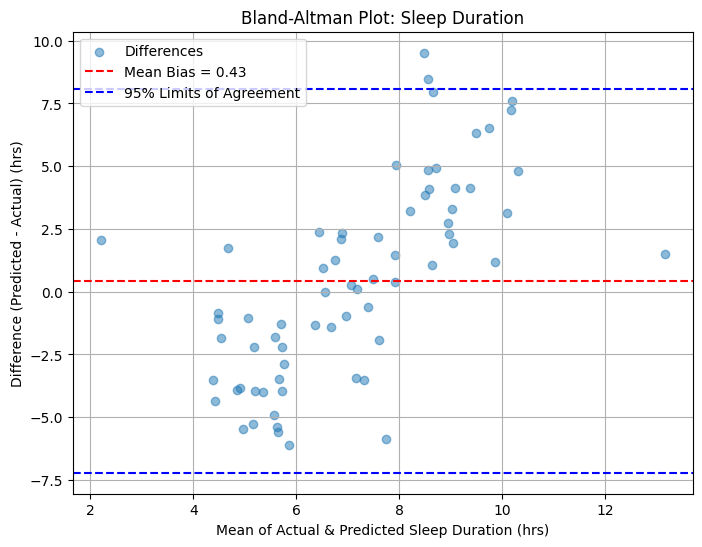

In [ ]:
import matplotlib.pyplot as plt
mean_values = (actual_sleep + predicted_sleep) / 2  # Average of actual & predicted

plt.figure(figsize=(8, 6))
plt.scatter(mean_values, bias, alpha=0.5, label="Differences")
plt.axhline(mean_bias, color='red', linestyle='--', label=f"Mean Bias = {mean_bias:.2f}")
plt.axhline(mean_bias + 1.96 * std_bias, color='blue', linestyle='--', label="95% Limits of Agreement")
plt.axhline(mean_bias - 1.96 * std_bias, color='blue', linestyle='--')
plt.xlabel("Mean of Actual & Predicted Sleep Duration (hrs)")
plt.ylabel("Difference (Predicted - Actual) (hrs)")
plt.title("Bland-Altman Plot: Sleep Duration")
plt.legend()
plt.grid(True)
plt.show()

**MAE AND RMSE**

In [ ]:
mae = mean_absolute_error(actual_sleep, predicted_sleep)
rmse = np.sqrt(mean_squared_error(actual_sleep, predicted_sleep))
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

MAE: 3.269
RMSE: 3.923


# **START/END ANALYSIS**

**Normality Check**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Function to check normality using Shapiro-Wilk test
def check_normality(data):
    stat, p_value = stats.shapiro(data.dropna())  # Drop NaN before testing
    return p_value > 0.05  # If p > 0.05, data is normally distributed

# Compute time differences in hours (actual - predicted)
start_time_diff = (final_sleep_df["Sleep Start"] - final_sleep_df["Predicted Sleep Start"]).dt.total_seconds() / 3600
end_time_diff = (final_sleep_df["Sleep End"] - final_sleep_df["Predicted Sleep End"]).dt.total_seconds() / 3600

# Remove NaN values before analysis
start_time_diff = start_time_diff.dropna()
end_time_diff = end_time_diff.dropna()

# Check normality for start and end times
start_normal = check_normality(start_time_diff)
end_normal = check_normality(end_time_diff)

if start_normal and end_normal:
    print("The data is normally distributed.")
else:
    print("The data is not normally distributed.")


The data is not normally distributed.


**Spearman's, Wilcoxon, MSE/RMSE, Bias**

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Drop NaN values
valid_df = final_sleep_df.dropna(subset=["Sleep Start", "Predicted Sleep Start", "Sleep End", "Predicted Sleep End"]).copy()

# Ensure timestamps are in datetime format
valid_df["Sleep Start"] = pd.to_datetime(valid_df["Sleep Start"])
valid_df["Predicted Sleep Start"] = pd.to_datetime(valid_df["Predicted Sleep Start"])
valid_df["Sleep End"] = pd.to_datetime(valid_df["Sleep End"])
valid_df["Predicted Sleep End"] = pd.to_datetime(valid_df["Predicted Sleep End"])

# Compute differences in HOURS
start_time_diff = (valid_df["Sleep Start"] - valid_df["Predicted Sleep Start"]).dt.total_seconds() / 3600
end_time_diff = (valid_df["Sleep End"] - valid_df["Predicted Sleep End"]).dt.total_seconds() / 3600

# Spearman Correlation
spearman_start_corr, spearman_start_p = stats.spearmanr(start_time_diff, end_time_diff)
spearman_end_corr, spearman_end_p = stats.spearmanr(end_time_diff, start_time_diff)

if spearman_start_p < 0.05:
    print("There is a significant correlation between the start time data.")
else:
    print("There is no significant correlation between the start time data.")

if spearman_end_p < 0.05:
    print("There is a significant correlation between the end time data.")
else:
    print("There is no significant correlation between the end time data.")

# Wilcoxon Signed-Rank Test
if len(start_time_diff.unique()) > 1:
    wilcoxon_start_stat, wilcoxon_start_p = stats.wilcoxon(start_time_diff)
else:
    wilcoxon_start_stat, wilcoxon_start_p = None, None

if len(end_time_diff.unique()) > 1:
    wilcoxon_end_stat, wilcoxon_end_p = stats.wilcoxon(end_time_diff)
else:
    wilcoxon_end_stat, wilcoxon_end_p = None, None

if wilcoxon_start_p < 0.05:
    print("The start time data is significantly different.")
else:
    print("The start time data is not significantly different.")
if wilcoxon_end_p < 0.05:
    print("The end time data is significantly different.")
else:
    print("The end time data is not significantly different.")


# Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) **in hours**
mae_start = mean_absolute_error(start_time_diff, np.zeros_like(start_time_diff))
rmse_start = np.sqrt(mean_squared_error(start_time_diff, np.zeros_like(start_time_diff)))

mae_end = mean_absolute_error(end_time_diff, np.zeros_like(end_time_diff))
rmse_end = np.sqrt(mean_squared_error(end_time_diff, np.zeros_like(end_time_diff)))

print(f"MAE (Start Time): {mae_start:.3f} hours")
print(f"RMSE (Start Time): {rmse_start:.3f} hours")
print(f"MAE (End Time): {mae_end:.3f} hours")
print(f"RMSE (End Time): {rmse_end:.3f} hours")

start_bias = start_time_diff
end_bias = end_time_diff

mean_start_bias = np.mean(start_bias)
std_start_bias = np.std(start_bias)

mean_end_bias = np.mean(end_bias)
std_end_bias = np.std(end_bias)

print(f"Mean Bias (Start Time): {mean_start_bias:.3f} hours")
print(f"Standard Deviation of Bias (Start Time): {std_start_bias:.3f} hours")
print(f"Mean Bias (End Time): {mean_end_bias:.3f} hours")
print(f"Standard Deviation of Bias (End Time): {std_end_bias:.3f} hours")


There is a significant correlation between the start time data.
There is a significant correlation between the end time data.
The start time data is significantly different.
The end time data is significantly different.
MAE (Start Time): 11.467 hours
RMSE (Start Time): 13.950 hours
MAE (End Time): 10.634 hours
RMSE (End Time): 12.060 hours
Mean Bias (Start Time): -11.330 hours
Standard Deviation of Bias (Start Time): 8.139 hours
Mean Bias (End Time): -10.634 hours
Standard Deviation of Bias (End Time): 5.688 hours


**Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression
X_start = valid_df["Predicted Sleep Start"].astype(int).values.reshape(-1, 1)  # Convert datetime to integer timestamp
y_start = valid_df["Sleep Start"].astype(int).values.reshape(-1, 1)

X_end = valid_df["Predicted Sleep End"].astype(int).values.reshape(-1, 1)
y_end = valid_df["Sleep End"].astype(int).values.reshape(-1, 1)

# Fit regression models
model_start = LinearRegression().fit(X_start, y_start)
model_end = LinearRegression().fit(X_end, y_end)

# Get coefficients
r2_start = model_start.score(X_start, y_start)
r2_end = model_end.score(X_end, y_end)

coef_start = model_start.coef_[0][0]
intercept_start = model_start.intercept_[0]

coef_end = model_end.coef_[0][0]
intercept_end = model_end.intercept_[0]

# Print results
print(f"Regression Equation for Sleep Start: Actual = {coef_start:.4f} * Predicted + {intercept_start:.4f}")
print(f"R² for Sleep Start Prediction: {r2_start:.4f}")

print(f"Regression Equation for Sleep End: Actual = {coef_end:.4f} * Predicted + {intercept_end:.4f}")
print(f"R² for Sleep End Prediction: {r2_end:.4f}")


Regression Equation for Sleep Start: Actual = 0.9996 * Predicted + 630840140179712.0000
R² for Sleep Start Prediction: 0.9998
Regression Equation for Sleep End: Actual = 0.9991 * Predicted + 1482493991930112.0000
R² for Sleep End Prediction: 0.9999


In [ ]:
#comparison_df.to_csv('/content/drive/My Drive/comparison_df.csv', index=False)